In [1]:
#import tensorflow as tf
#import tensorflow.keras as keras

import keras
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import qgrid
import cv2

#train_data_dir = 'C:/devenv/datasets/malaria_hero/images'
train_data_dir = 'C:/Users/User/SAP project'
labels = ['Uninfected','Parasitized']
#valid_data_dir = 'f1_mal/valid'

def extract_filenames_and_labels():
    result = []
    for idx, folder_name in enumerate(labels):
        files = glob.glob(train_data_dir + '/' + folder_name + '/*.png') 
        for filename in files:
            result.append((filename , idx))
            
    return result
    
    
dataset = extract_filenames_and_labels()
print(len(dataset))

df = pd.DataFrame(dataset,columns=['filename','label'])
df.to_csv('C:/Users/User/SAP project/images.csv', sep='\t')

print('Uninfected: ',len(df[df['label'] == 0]))
print('Infected: ',len(df[df['label'] == 1]))
qgrid.show_grid(df)
#print(images)

# TODO save the dataset to csv/excel to have reproducible results and one-one mapping to the feature vectors np matrix
# DONE

C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


27558
Uninfected:  13779
Infected:  13779


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [2]:
#old padding

sizes = []
max_width = 385
max_height = 394

for filename, label in dataset:
    img = cv2.imread(filename, cv2.IMREAD_COLOR)
    img_width = img.shape[0]
    img_height = img.shape[1]
    img = cv2.copyMakeBorder(img,0,max_width - img_width,0,max_height - img_height, cv2.BORDER_CONSTANT, value = 0)
    #print(img.shape, img.dtype)
    sizes.append((filename,img.shape[0],img.shape[1],label))
    cv2.imwrite(filename,img)

images = [cv2.imread(filename,cv2.IMREAD_COLOR) for filename, label in dataset]
sizes_df = pd.DataFrame(sizes,columns=['filename','width','height','label'])
qgrid.show_grid(sizes_df)
#print(sizes_df)
# TODO pad to 385 394
# DONE

KeyboardInterrupt: 

In [21]:
# TODO rewrite this to keras, because it can accomodate arbitrary imput shape
# Hint use keras model.predict to pass an image np array and get the vector as an output
features = inception_v3(images)

steps = int(n_samples/batch_size)
print('Steps: ',steps)

data = np.zeros((n_samples,features.shape[1].value),dtype=np.float32)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(steps):
        print(step,'\r',end='')
        f_data = sess.run(features)
        data[step*batch_size : step*batch_size+batch_size,:] = f_data
        if step % 100 == 0:
            print('Saving intermediate data \r', end='')
            np.save('C:/devenv/datasets/malaria_hero/features',data)            


print('Saving final data')
np.save('C:/devenv/datasets/celeba/features',data)

NameError: name 'inception_v3' is not defined

In [2]:
import keras
keras_iv3 = keras.applications.inception_v3.InceptionV3(include_top=False,pooling='max')
#keras_iv3.summary()

In [8]:
keras_iv3.input.shape

TensorShape([Dimension(None), Dimension(None), Dimension(None), Dimension(3)])

In [23]:
keras_iv3.output.shape

TensorShape([Dimension(None), Dimension(2048)])

In [23]:
number_batches = len(dataset)
print(number_batches)

def load_batch(filename):
    image = cv2.imread(filename, cv2.IMREAD_COLOR)
    if image.shape[0] < 75:
        image = cv2.copyMakeBorder(image,0,75 - image.shape[0],0,0, cv2.BORDER_CONSTANT, value = 0)
    if image.shape[1] < 75:
        image = cv2.copyMakeBorder(image,0,0,0,75 - image.shape[1], cv2.BORDER_CONSTANT, value = 0)
    ret_image = np.zeros((1,image.shape[0],image.shape[1],3))
    ret_image[0] = image
    return ret_image

def gen():
    br = 0
    for filename, idx in dataset:
        br+=1
        if(br%10 == 0):
            print(br/10)
        yield load_batch(filename)

mal_dataset = keras_iv3.predict_generator(gen(),steps = number_batches)
#print(output)

27558
1.0
2.0
3.0
4.0
5.0
6.0


KeyboardInterrupt: 

In [77]:

np.save('results', mal_dataset)

In [2]:
mal_dataset = np.load('results.npy')
print(mal_dataset)
print(mal_dataset.shape)

mal_labels = np.zeros(27558,dtype = int)
for i in range((int)(len(dataset)/2)):
    mal_labels[i+(int)(len(dataset)/2)] = 1
print(mal_labels)

[[ -35.452225   -11.4555      -3.2935634 ...  -57.529243   -92.935165
  -117.38767  ]
 [  20.81494    -38.573498    16.344395  ...  -59.317223   -61.54082
  -115.00306  ]
 [ -17.221985   -56.65025      9.2415495 ...  -16.58429    -55.554867
  -119.33124  ]
 ...
 [ -64.47558     11.814479   -27.279491  ...  -77.082634   -77.97507
  -154.45508  ]
 [ -40.8306     -33.006557    28.440344  ...  -62.344162   -75.10434
  -117.493095 ]
 [ -19.968843   -39.402176   -50.251736  ...    1.0486354  -49.9575
   -89.14464  ]]
(27558, 2048)
[0 0 0 ... 1 1 1]


In [3]:
print(mal_dataset.shape)


(27558, 2048)


In [3]:
from sklearn import datasets
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set(color_codes=True)


components:
 [[-0.00569244 -0.01098736]
 [-0.0099183  -0.00054775]
 [-0.00792693 -0.01082763]
 ...
 [ 0.02162767  0.04979449]
 [ 0.07437487  0.06191751]
 [ 0.01369904  0.05280554]]
explained ratio:
 [0.26265365 0.18971853]


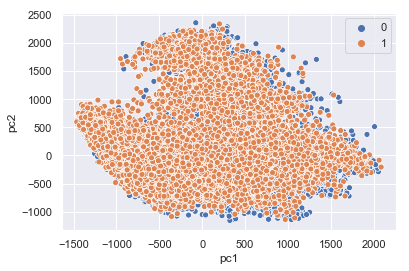

In [4]:
pca = PCA(n_components = 2, whiten = False).fit(mal_dataset)
print('components:\n',pca.components_.T)
print('explained ratio:\n',pca.explained_variance_ratio_)

reduced = pca.transform(mal_dataset)

df = pd.DataFrame(reduced,columns=['pc1','pc2'])
sns.scatterplot(data=df,x='pc1',y='pc2',hue = mal_labels)


In [8]:
#support vector machine
#pca = PCA(n_components = 300, whiten = False).fit(mal_dataset)
#mal_dataset_pca = pca.transform(mal_dataset)
mal_dataset_pca = mal_dataset
half = 13779
from sklearn import svm
Xtrain = np.concatenate((mal_dataset_pca[:10000],mal_dataset_pca[half:half+10000]))
Ytrain = np.concatenate((mal_labels[:10000],mal_labels[half:half+10000]))
Xtest = np.concatenate((mal_dataset_pca[10000:half],mal_dataset_pca[half+10000:]))
Ytest = np.concatenate((mal_labels[10000:half],mal_labels[half+10000:]))
print(Xtrain.shape)

clf = svm.LinearSVC()
clf.fit(Xtrain, Ytrain)
print('FITTTTT')
result = clf.predict(Xtest)
br = 0
for i in range(len(result)):
    if result[i] == Ytest[i]:
        br+=1
print(100*br/len(result))

(20000, 2048)
FITTTTT
75.5093940195819
